# Important focus points

- EDA - Complete
- Feature engineering - Complete
- Preprocessing - Complete
- Model selection and training - Complete
- Evaluation - Incomplete

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
# loading the sales dataset with Order Number as the index collumn

sales_data = pd.read_csv('US_Regional_Sales_Data.csv', index_col='OrderNumber')

In [3]:
sales_data

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
OrderNumber,,,,,,,,,,,,,,,
SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"


# 1. Exploratory Data Analysis

## 1.1 First 5 rows of sales data

In [4]:
# Printing first 5 rows of dataset

sales_data.head()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
OrderNumber,,,,,,,,,,,,,,,
SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


## 1.2 Last 5 rows of sales data

In [5]:
# Printing last 5 rows of dataset

sales_data.tail()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
OrderNumber,,,,,,,,,,,,,,,
SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"
SO - 0008091,In-Store,WARE-UHY1004,26/9/20,30/12/20,13/1/21,19/1/21,USD,6,41,237,43,5,0.075,"1,370.82","2,211.00"


## 1.3 Dataset statistics

In [6]:
# printing the datasets statistics/characteristics

data_description = sales_data.describe()

data_description

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


In [7]:
# All columns present in the dataset

dataset_columns = sales_data.columns

print('Dataset Columns:\n' + str(dataset_columns))

Dataset Columns:
Index(['Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate',
       'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')


## 1.4 Dataset data types

In [8]:
# printing all dataatypes in the dataset

dataset_types = sales_data.dtypes

print('Data types:\n' + str(dataset_types))

Data types:
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost            object
Unit Price           object
dtype: object


## 1.5 Dataset unique value count 

In [9]:
# printing all unique values in each collumn

wareHouseCount = sales_data.WarehouseCode.nunique()

StoreCount = sales_data._StoreID.nunique()

saleChannelCount = sales_data['Sales Channel'].nunique()

customerCount = sales_data._CustomerID.nunique()

productCount = sales_data._ProductID.nunique()

currencies = sales_data.CurrencyCode.nunique()



print('Number of warehouses: ' + str(wareHouseCount))

print('Number of stores: ' + str(StoreCount))

print('Sale channels count: ' + str(saleChannelCount))

print('Number of customers: ' + str(customerCount))

print('Number of products: ' + str(productCount))

print('Currencies used: ' + str(currencies))

Number of warehouses: 6
Number of stores: 367
Sale channels count: 4
Number of customers: 50
Number of products: 47
Currencies used: 1


## 1.6 Missing Value Count 

In [10]:
# finding all missing values in the dataset

missing_data = sales_data.isnull().sum()

print('Missing values:\n' +  str(missing_data))

Missing values:
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64


## 1.7 Duplicate Value Count

In [11]:
# finding all duplicate values in the dataset

duplicated_data = sales_data.duplicated().sum()

print('Duplicated values: ' +  str(duplicated_data))

Duplicated values: 0


## 1.8 Visualisations

### 1.8.1 Distribution of Sale Channels

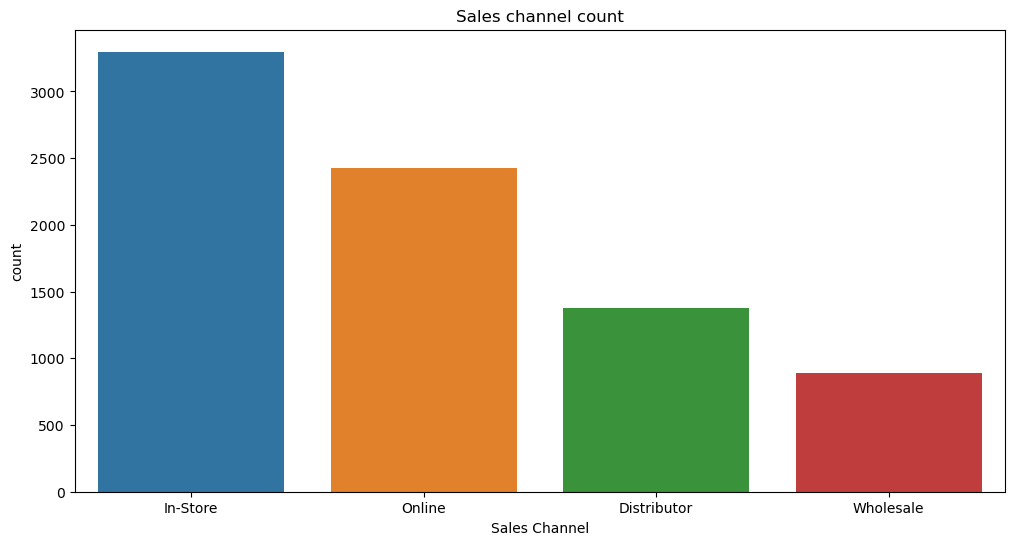

In [12]:
# function to present a sales channel count

def channelCount(data): 
    plt.figure(figsize=(12,6))
    sns.countplot(data=sales_data, x='Sales Channel')
    plt.title('Sales channel count')
    plt.show()
    
channelCount(sales_data)

### 1.8.2 Distribution of Discounts Applied

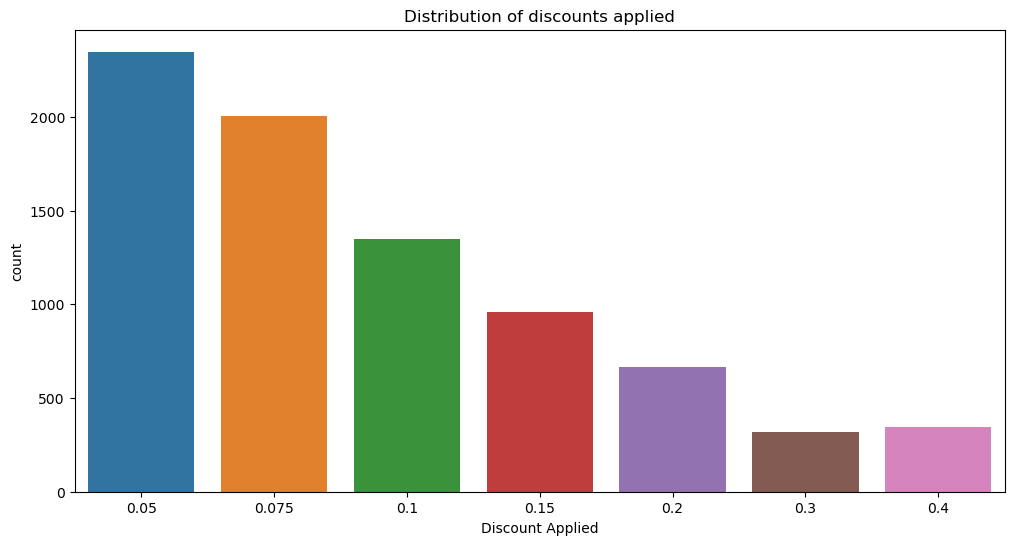

In [13]:
# function to count the number of discounts applied

def discountCount(data): 
    plt.figure(figsize=(12,6))
    sns.countplot(data=sales_data, x='Discount Applied')
    plt.title('Distribution of discounts applied')
    plt.show()
    
discountCount(sales_data)

### 1.8.3 Distribution of Sales by Warehouse

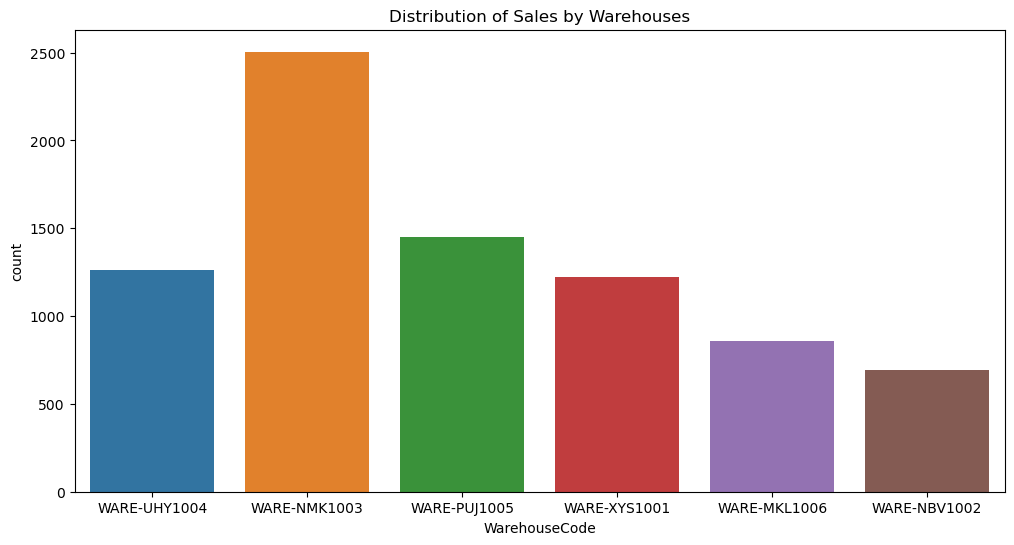

In [14]:
# function visualising each warehouses sale count

def warehouseSaleCount(data):
    plt.figure(figsize=(12,6))
    sns.countplot(data=sales_data, x='WarehouseCode')
    plt.title('Distribution of Sales by Warehouses')
    plt.show()
    
warehouseSaleCount(sales_data)

### 1.8.4 Distribution of Sales by Product

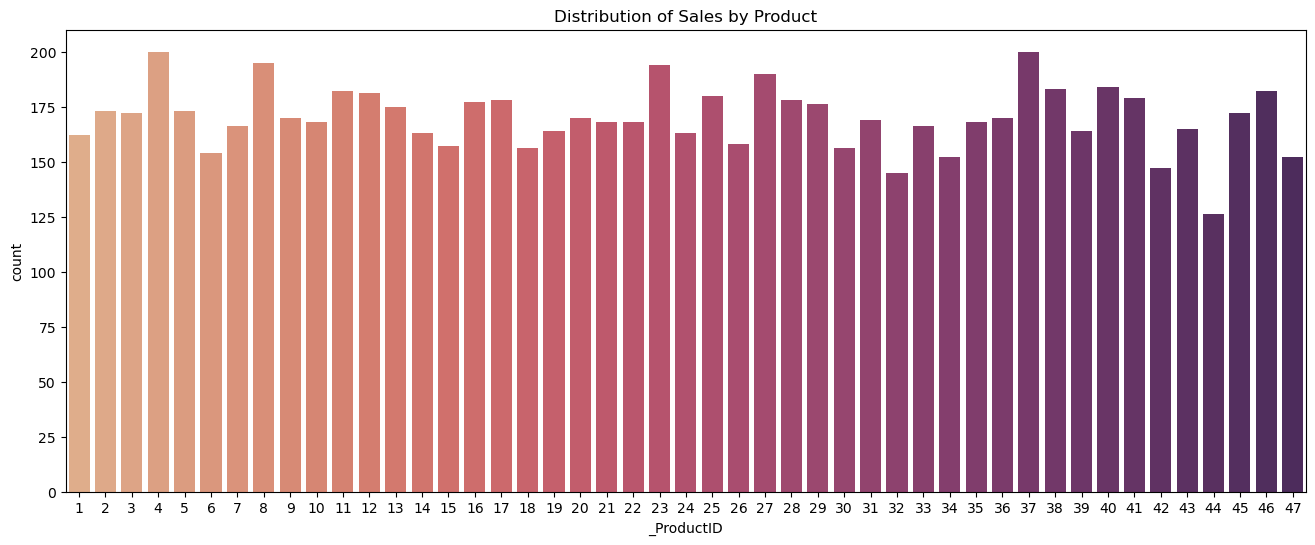

In [15]:
# function visualising each warehouses product sale count

def productSaleCount(data):
    plt.figure(figsize=(16,6))
    sns.countplot(data=sales_data, x='_ProductID', palette='flare')
    plt.title('Distribution of Sales by Product')
    plt.show()
    
productSaleCount(sales_data)

### 1.8.5 Distribution of Sales by Product

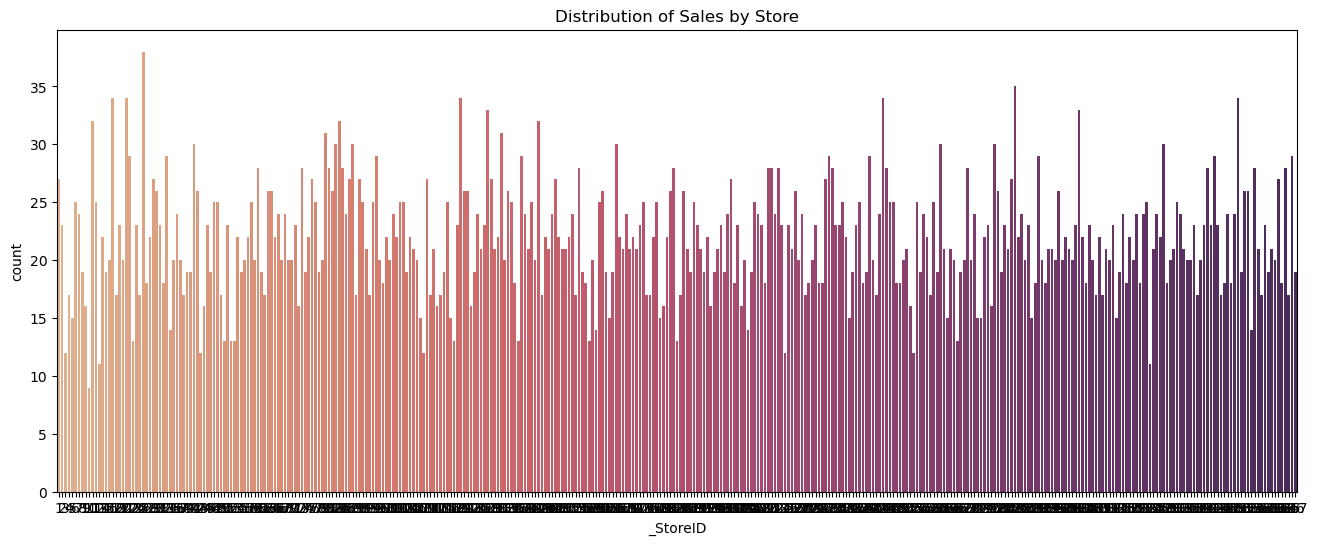

In [16]:
# function visualising each stores product sale count

def productSaleCount(data):
    plt.figure(figsize=(16,6))
    sns.countplot(data=sales_data, x='_StoreID', palette='flare')
    plt.title('Distribution of Sales by Store')
    plt.show()
    
productSaleCount(sales_data)

### 1.8.6 Unit Cost to Price Relationship

In [17]:
# Replacing all commas in 'Unit Cost' and 'Unit Price' with ''
sales_data["Unit Cost"] = sales_data["Unit Cost"].str.replace(',', '', regex=False)
sales_data["Unit Price"] = sales_data["Unit Price"].str.replace(',', '', regex=False)

# Converting 'Unit Cost' and 'Unit Price' strings to floats
sales_data["Unit Cost"] = sales_data["Unit Cost"].astype(float)
sales_data["Unit Price"] = sales_data["Unit Price"].astype(float)

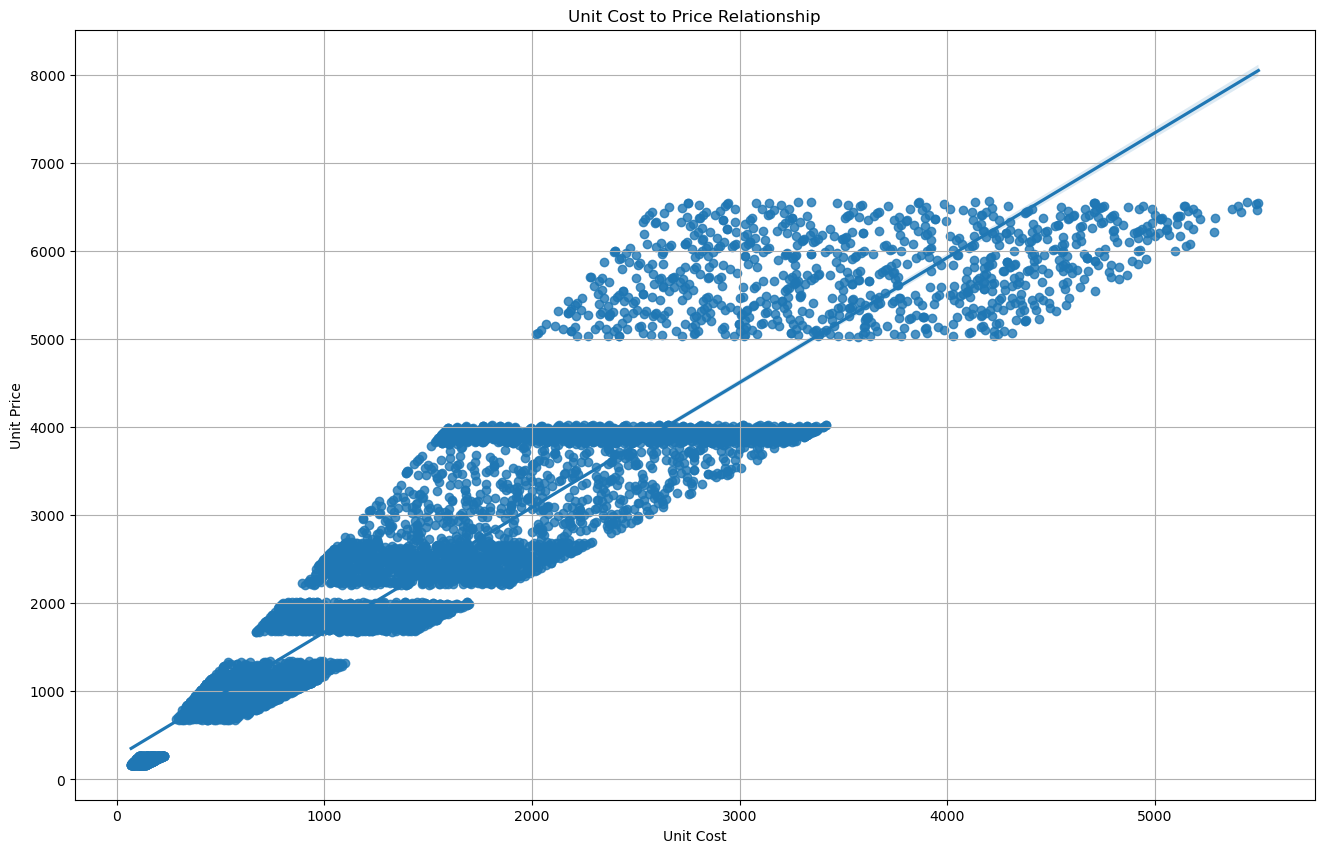

In [18]:
# function visualising the impact of unit cost on unit price

def costToPricePlot(data):
    plt.figure(figsize=(16,10))
    sns.regplot(x='Unit Cost',y='Unit Price',data=sales_data)
    plt.title('Unit Cost to Price Relationship')
    plt.grid()
    plt.show()
    
costToPricePlot(sales_data)

### 1.8.7 Distribution of Order Quantity by Discount Applied

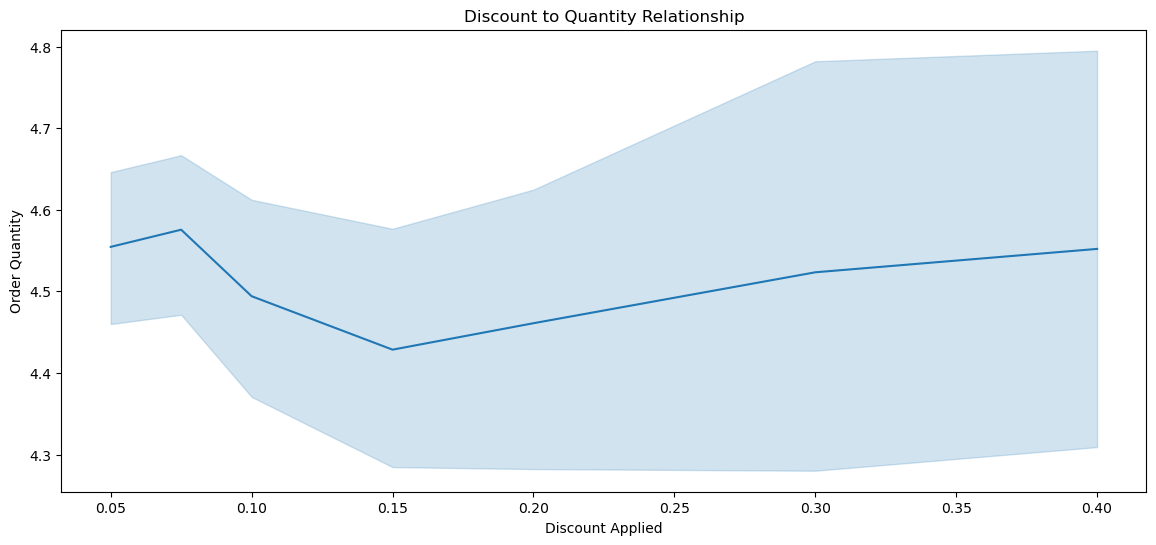

In [19]:
# function visualising order quantity to discounts applied relationship

def quantityDiscountLineChart(data):
    plt.figure(figsize=(14,6))
    plt.title("Discount to Quantity Relationship")
    sns.lineplot(data=sales_data, x='Discount Applied', y='Order Quantity',)
    plt.show()
    
quantityDiscountLineChart(sales_data)

### 1.8.8 Distribution of numerical features in the dataset

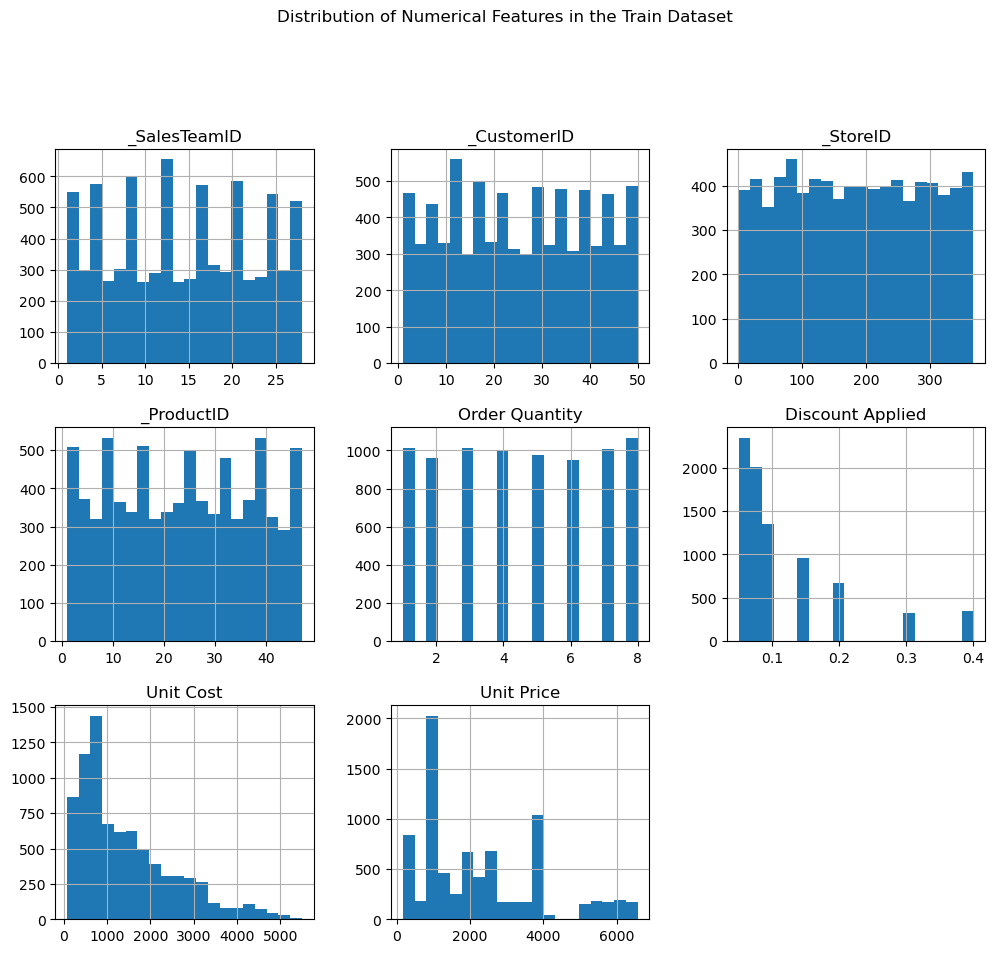

In [20]:
# function visualising numerical fetaures in the dataset

def numDistribution(data):
    sales_data.hist(figsize=(12, 10), bins=20)
    plt.suptitle("Distribution of Numerical Features in the Train Dataset", y=1.02, fontsize=12)
    plt.show()
    
numDistribution(sales_data)

#### Visualising sales overtime

Text(0.5, 1.0, 'Sales Over Time')

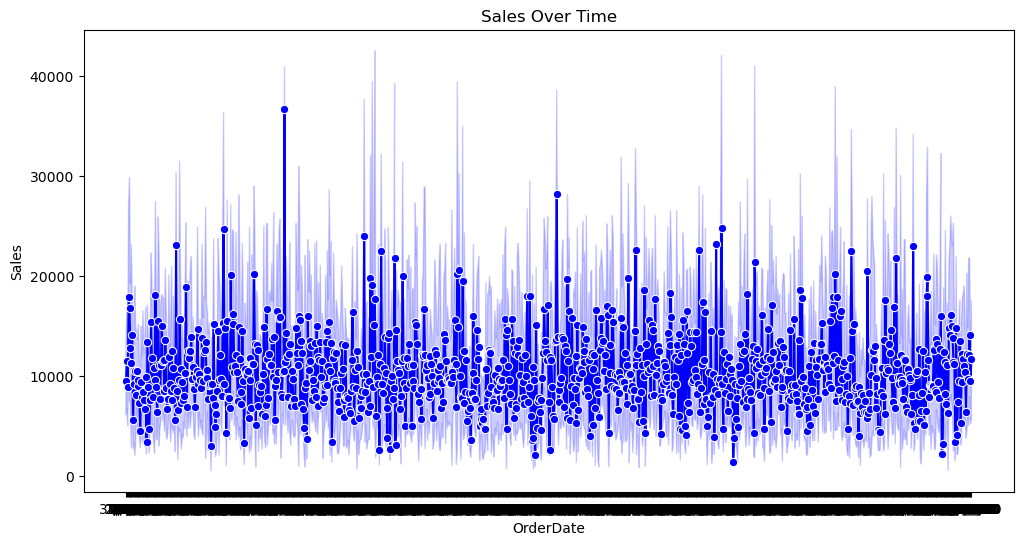

In [21]:
# creating a sales feature - price charged * quantity 
sales_data['Sales'] = (sales_data['Unit Price'] - sales_data['Discount Applied']) * sales_data['Order Quantity']

# grouping sales to daily sales by 'OrderDate'
daily_sales = sales_data.groupby('OrderDate')['Sales'].sum().reset_index()

# visualising sales overtime 
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='OrderDate', y='Sales', marker='o', color='b')
plt.title('Sales Over Time')

### 1.8.9 Visualising potential outliers using box plots

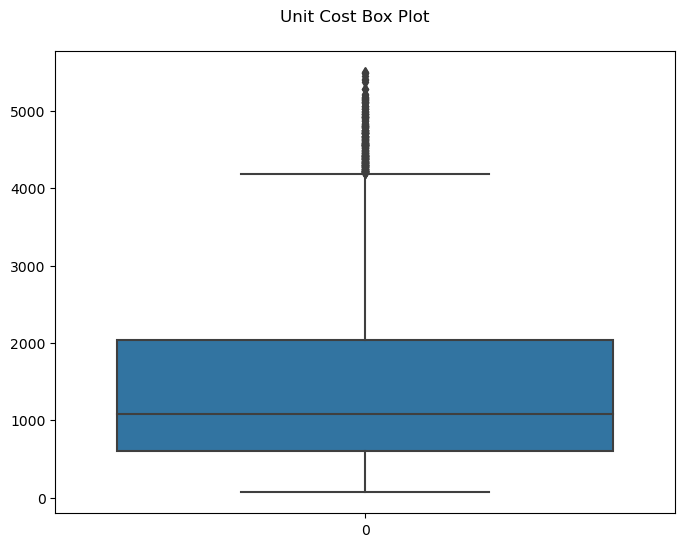

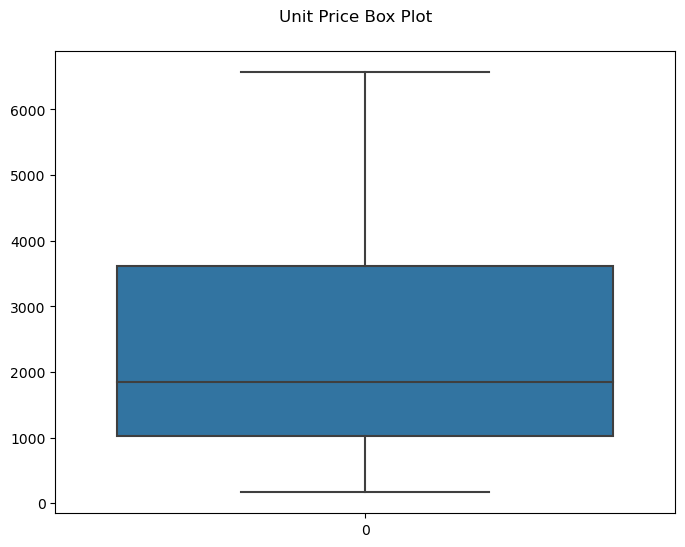

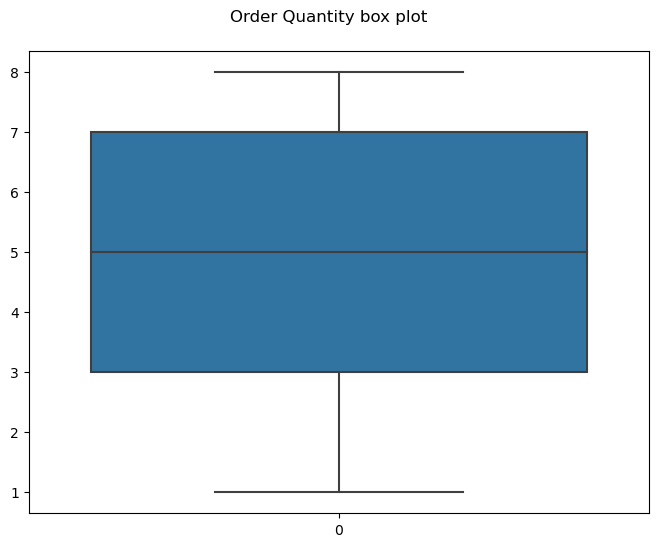

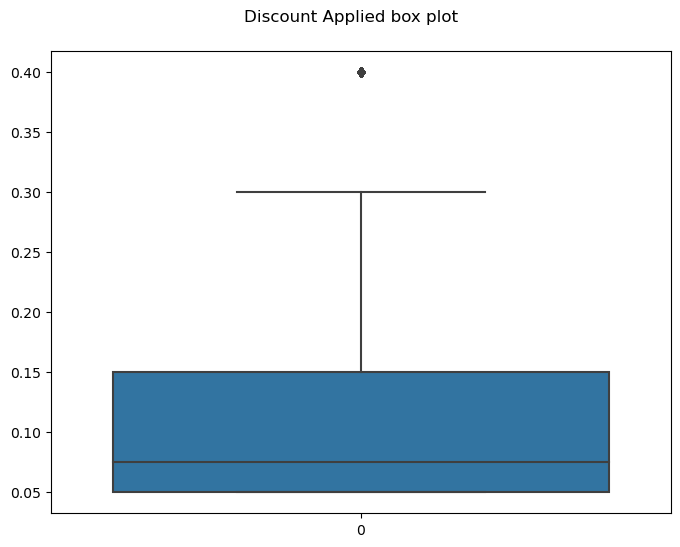

In [22]:
# creating box plots to visualise outliers in each of the 'Unit cost', 'Unit Price', 'Order Quantity' and 'discount applied'

def BoxPlotsCost(data):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=sales_data["Unit Cost"])
    plt.suptitle("Unit Cost Box Plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsPrice(data):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=sales_data["Unit Price"])
    plt.suptitle("Unit Price Box Plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsOrderQuantity(data):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=sales_data["Order Quantity"])
    plt.suptitle("Order Quantity box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsDiscounts(data):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=sales_data["Discount Applied"])
    plt.suptitle("Discount Applied box plot", y=0.95, fontsize=12)
    plt.show()
    
BoxPlotsCost(sales_data)
BoxPlotsPrice(sales_data)
BoxPlotsOrderQuantity(sales_data)
BoxPlotsDiscounts(sales_data)

# 2. Preprocessing

## 2.1 Handling missing values

### There are no missing values in the dataset, therefore this step does not apply

In [23]:
# printing missing values within the dataset

print('Missing values:\n' +  str(missing_data))

Missing values:
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64


## 2.2 Feature engineering

### Creating features to represent Profit, Margin and Total Revenue

In [24]:
# creating a total revenue feature: 'Unit Price' * 'Order Quantity' *  amount after discount 
sales_data['Total Revenue'] = (sales_data['Unit Price'] * sales_data['Order Quantity']) * (1 - sales_data['Discount Applied'])

# creating a profit feature: 'Total revenue' - 'Unit cost' * 'Order Quantity'
sales_data['Profit'] = sales_data['Total Revenue'] - (sales_data['Unit Cost'] * sales_data['Order Quantity'])

# creating a profit feature: 'Unit Price' - 'Unit Cost' * 'Order Quantity'
sales_data['Margin'] = (sales_data['Unit Price'] - sales_data['Unit Cost']) * sales_data['Order Quantity']

## 2.3 Encoding categorical values

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# defining all categorical features in the dataset
cat_features = ['Sales Channel','WarehouseCode','ProcuredDate',
                'OrderDate','ShipDate','DeliveryDate','CurrencyCode']

# applying label encoder
encoder = LabelEncoder()
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoding all categorical values using label encoder
encoded_cat = sales_data[cat_features].apply(encoder.fit_transform)
#encoded_cat = encoder.fit_transform(sales_data[cat_features])


#encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features), index=sales_data.index)

# combining encoded categorical columns with the rest of the dataset
sales_encoded = pd.concat([sales_data.drop(cat_features, axis=1), encoded_cat], axis=1)
#sales_encoded = pd.concat([sales_data.drop(cat_features, axis=1), encoded_cat_df], axis=1)

# Displaying the dataset with enocded categorical values
sales_encoded

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Sales,Total Revenue,Profit,Margin,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode
OrderNumber,,,,,,,,,,,,,,,,,,,
SO - 000101,6,15,259,12,5,0.075,1001.18,1963.1,9815.125,9079.3375,4073.4375,4809.60,1,4,9,750,179,338,0
SO - 000102,14,20,196,27,3,0.075,3348.66,3939.6,11818.575,10932.3900,886.4100,1772.82,2,2,9,750,467,373,0
SO - 000103,21,16,213,16,1,0.050,781.22,1775.5,1775.450,1686.7250,905.5050,994.28,0,4,9,750,435,22,0
SO - 000104,28,48,107,23,8,0.075,1464.69,2324.9,18598.600,17204.2600,5486.7400,6881.68,3,2,9,750,371,892,0
SO - 000105,22,49,111,26,8,0.100,1476.14,1822.4,14578.400,13121.2800,1312.1600,2770.08,0,2,2,750,243,593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO - 0008087,9,41,339,29,1,0.075,121.94,234.5,234.425,216.9125,94.9725,112.56,1,0,7,722,872,160,0
SO - 0008088,14,29,202,3,6,0.050,1921.56,3202.6,19215.300,18254.8200,6725.4600,7686.24,2,2,7,722,353,781,0
SO - 0008089,14,32,241,35,5,0.200,2792.76,3825.7,19127.500,15302.8000,1339.0000,5164.70,2,4,7,722,481,575,0


## 2.4 Normalising numerical values

In [26]:
from sklearn.preprocessing import MinMaxScaler

# defining all numerical features
numeric_features = ['_SalesTeamID', '_CustomerID', '_StoreID',
                    '_ProductID','Order Quantity','Discount Applied','Unit Cost','Unit Price','Profit','Margin','Total Revenue']

# using min max scaler 
scaler = MinMaxScaler() 

# scaling all numerical features in the dataset
sales_encoded[numeric_features] = scaler.fit_transform(sales_encoded[numeric_features])


## 2.5 Outlier Detection
Considering the boxplots visualised potential outliers this step is required

In [27]:
from sklearn.neighbors import NearestNeighbors

# outlining features with potential outliers
OutlierFeaturesNormalised = sales_encoded[['Unit Cost', 'Unit Price', 'Discount Applied']]

# initialising the KNN model using nearest neighbors
knnModel = NearestNeighbors(n_neighbors= 21) 

# applying the model to the chosen features
knnModel.fit(OutlierFeaturesNormalised)

# initialising outlier distances and indicies
distances, indices = knnModel.kneighbors(OutlierFeaturesNormalised)

# computing anomoly scores to be the average of its nearest 20 neighbors
anomalyScores = np.mean(distances, axis=1)

# defining the threshold to identify outliers
threshold =  0.1

# finding indicies of points with distances/anomoly score exceeds the threhsold
outliersIndices = np.where(anomalyScores > threshold)[0]

# printing the outlier count
numOutliers = len(outliersIndices)

print(f'Number of outliers: {numOutliers}')
print(f'Indices of outliers: {outliersIndices}')

Number of outliers: 73
Indices of outliers: [ 439  695  890  902  985 1018 1028 1106 1294 1348 1488 1592 1857 2038
 2211 2231 2359 2477 2551 2617 2653 2676 2816 2943 3022 3034 3171 3312
 3512 3603 3947 3961 3972 4162 4222 4321 4350 4447 4462 4504 4529 4613
 4635 4655 4946 5265 5331 5520 5629 5713 5794 5844 5881 5936 6065 6263
 6667 6688 6797 6805 6834 6879 7134 7209 7429 7490 7569 7649 7777 7810
 7826 7902 7968]


## 2.6 Outlier imputation

In [28]:
from sklearn.impute import KNNImputer

# making a copy of the dataframe with outliers
OutlierData = sales_encoded[['Unit Price', 'Unit Cost', 'Discount Applied']].copy()

# setting outliers to nan
for index in outliersIndices:
    OutlierData.loc[index, ['Unit Price', 'Unit Cost', 'Discount Applied']] = np.nan    

# initialsing imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data (ensure it's 2D)
data_imputed = imputer.fit_transform(OutlierData)

# adding the imputed data back to the dataframe
OutlierData_imputed = pd.DataFrame(data_imputed, columns=OutlierData.columns, index=OutlierData.index)

# Replace the original sales_data with imputed values
sales_encoded.update(OutlierData_imputed)

In [29]:
# ensuring outlier datapoints are set to NaN before imputation
print(OutlierData.loc[outliersIndices])

             Unit Price  Unit Cost  Discount Applied
OrderNumber                                         
439                 NaN        NaN               NaN
695                 NaN        NaN               NaN
890                 NaN        NaN               NaN
902                 NaN        NaN               NaN
985                 NaN        NaN               NaN
...                 ...        ...               ...
7777                NaN        NaN               NaN
7810                NaN        NaN               NaN
7826                NaN        NaN               NaN
7902                NaN        NaN               NaN
7968                NaN        NaN               NaN

[73 rows x 3 columns]


In [30]:
# ensuring outliers are imputed
print(OutlierData_imputed.loc[outliersIndices])

             Unit Price  Unit Cost  Discount Applied
OrderNumber                                         
439            0.330865   0.251061          0.183984
695            0.330865   0.251061          0.183984
890            0.330865   0.251061          0.183984
902            0.330865   0.251061          0.183984
985            0.330865   0.251061          0.183984
...                 ...        ...               ...
7777           0.330865   0.251061          0.183984
7810           0.330865   0.251061          0.183984
7826           0.330865   0.251061          0.183984
7902           0.330865   0.251061          0.183984
7968           0.330865   0.251061          0.183984

[73 rows x 3 columns]


In [31]:
# checking outlier count before imputation
print(OutlierData.isnull().sum())

Unit Price          73
Unit Cost           73
Discount Applied    73
dtype: int64


In [32]:
# checking outlier count after imputation
print(OutlierData_imputed.isnull().sum())

Unit Price          0
Unit Cost           0
Discount Applied    0
dtype: int64


## 2.7 Feature selection

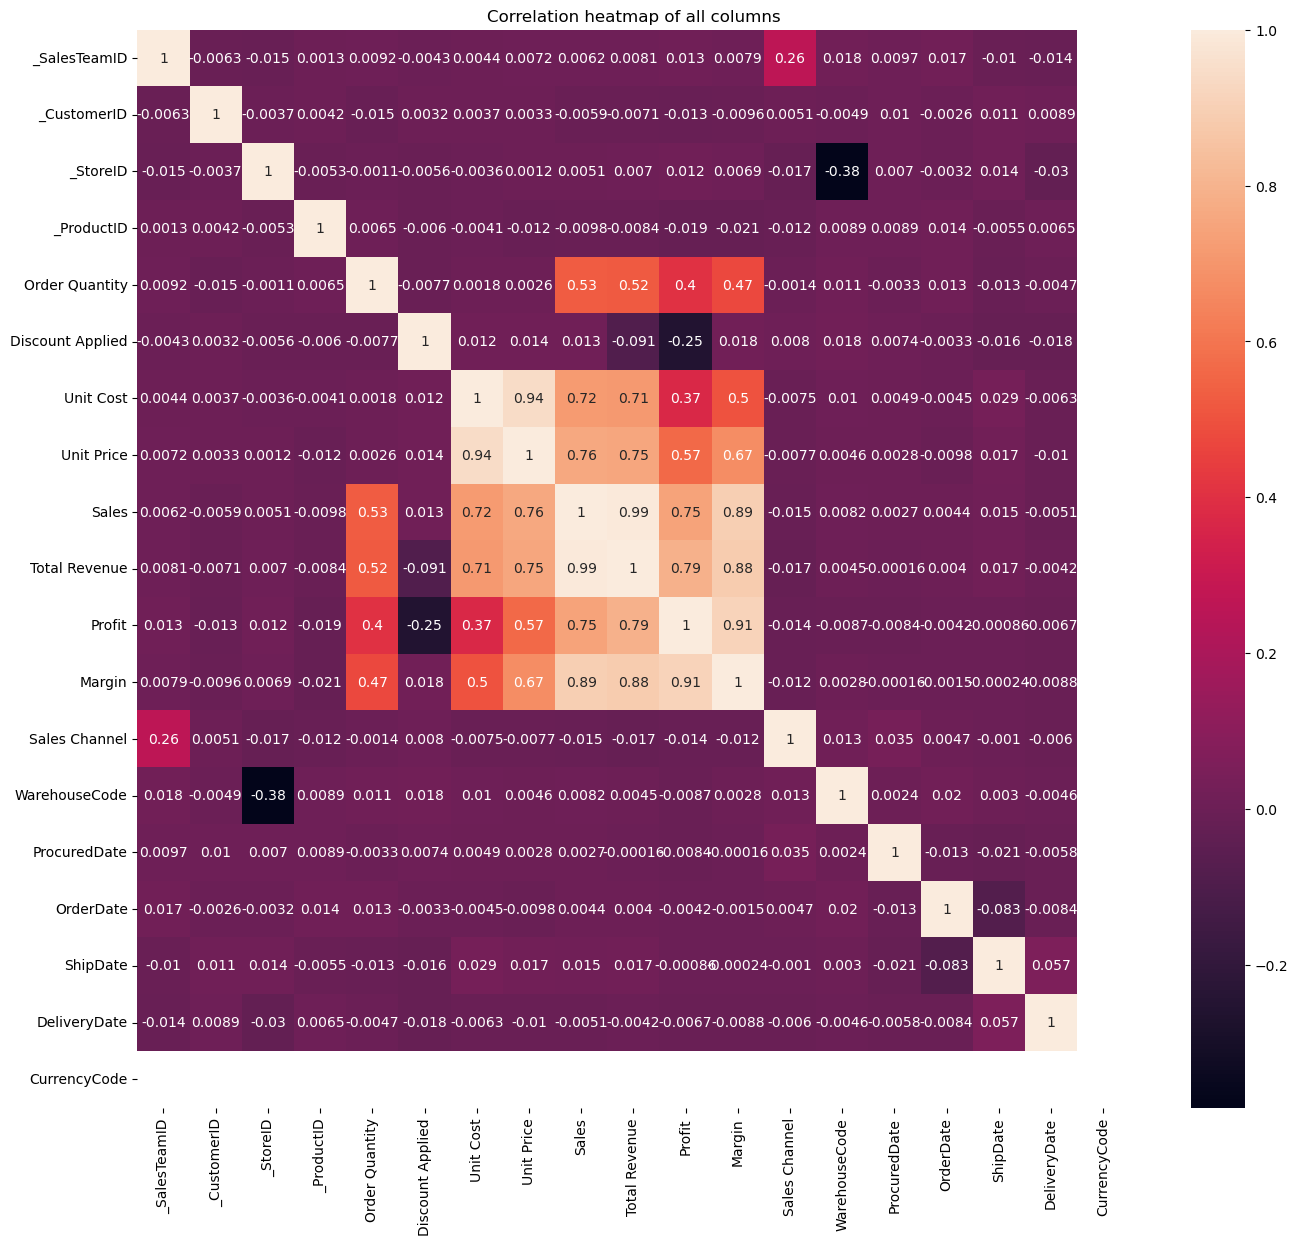

In [33]:
# Creating a heatmap visualising features correlation

def correlationHeatmap(data):
    plt.figure(figsize=(16,14))
    plt.title('Correlation heatmap of all columns')
    sns.heatmap(sales_encoded.corr(), annot=True)
    plt.show()
    
correlationHeatmap(data_imputed)  

###    Selected features

In [34]:
# defining features included in the regression  models and target features
features = ['Unit Cost','Order Quantity', 'Sales Channel','Discount Applied', 'WarehouseCode', 'Profit', 'Margin', 'Total Revenue']
target = ['Unit Price']

x = sales_encoded[features]
y = sales_encoded[target]

## 2.8 Performing data splits

#### 70-15-15 Split

In [35]:
from sklearn.model_selection import train_test_split

# setting a constant random state
random_state = 42

# performing a 70-15-15 split on the original dataset
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=random_state)

In [36]:
# checking the dataframes shape to dimensions are appropriate
print(y_train.shape, y_test.shape)

(5593, 1) (1199, 1)


#### Converting all 2D arrays to 1D 
considering both dataframes are 2D arrays with 1 column

In [37]:
y_train = y_train.squeeze() 
y_test = y_test.squeeze()

# 3. Model Creation and Training

## 3.1 Linear Regression 

Mean Absolute Error (MAE): 0.023774551432081664
R-squared (R2): 0.9763846165826319


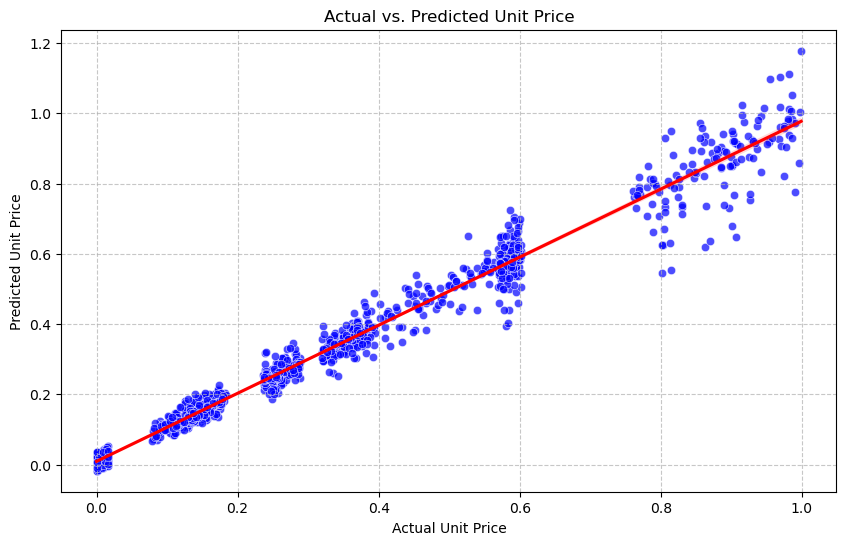

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score    

# defining linear regression model
LinearModel = LinearRegression()

# training the linear regression model
LinearModel.fit(x_train, y_train)

# predicting the target feature
y_pred = LinearModel.predict(x_test)

# using MAE and R2 metrics to measure model accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing both MAE and r2 metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}') 

# visualising the regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.xlabel('Actual Unit Price')
plt.ylabel('Predicted Unit Price')
plt.title('Actual vs. Predicted Unit Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Using cross validation to increase accuracy

In [39]:
from sklearn.model_selection import cross_val_score, KFold

# splitting the dataset 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# finding MAE and R2 scores of each fold
r2_scores = cross_val_score(LinearModel, x, y, cv=kf, scoring='r2')
mae_scores = -cross_val_score(LinearModel, x, y, cv=kf, scoring='neg_mean_absolute_error')

# printing the average MAE and R2 scores for all folds
print(f'Average MAE: {mae_scores.mean()}')
print(f'Average R-squared: {r2_scores.mean()}')

Average MAE: 0.02465530356675363
Average R-squared: 0.9763110860212688


## 3.2 Random Forest Regression 

Mean Absolute Error (MAE): 0.009772026426908983
R-squared Value: 0.9950315518959335


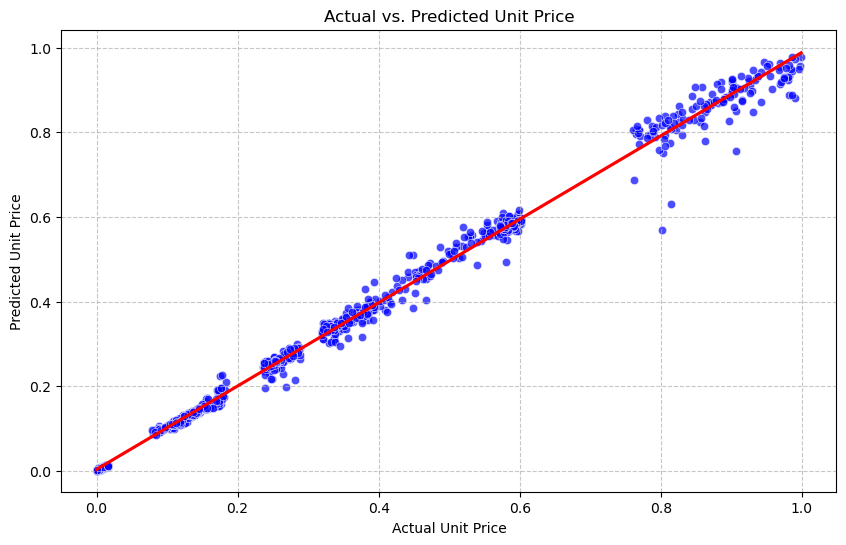

In [40]:
from sklearn.ensemble import RandomForestRegressor

# defining linear regression model
RandomForestModel = RandomForestRegressor()

# training the Random Forest regression model
RandomForestModel.fit(x_train, y_train)

# predicting the target feature
y_pred = RandomForestModel.predict(x_test)

# using MAE and R2 metrics to measure model accuracy
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# printing both MAE and r2 metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Value: {r_squared}")

# visualising the regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.xlabel('Actual Unit Price')
plt.ylabel('Predicted Unit Price')
plt.title('Actual vs. Predicted Unit Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Using cross validation to increase accuracy

In [41]:
y = y.squeeze() 

In [42]:
from sklearn.model_selection import cross_val_score, KFold

# splitting the dataset 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# finding MAE and R2 scores of each fold
r2_scores = cross_val_score(RandomForestModel, x, y, cv=kf, scoring='r2')
mae_scores = -cross_val_score(RandomForestModel, x, y, cv=kf, scoring='neg_mean_absolute_error')

# printing the average MAE and R2 scores for all folds
print(f'Average MAE: {mae_scores.mean()}')
print(f'Average R-squared: {r2_scores.mean()}')

Average MAE: 0.00952103252205046
Average R-squared: 0.9954975985863026


## 3.3 SVR Regression model

Mean Absolute Error (MAE): 0.039247969319891045
R-squared Value: 0.9620005259210068


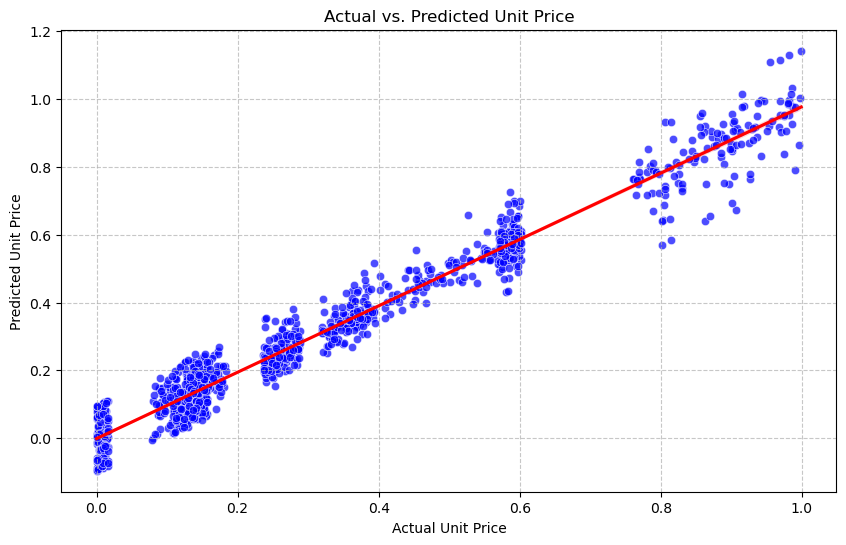

In [43]:
from sklearn.svm import SVR 

# defining SVR model
SVRmodel = SVR(kernel='linear')

# training the SVR regression model
SVRmodel.fit(x_train, y_train)

# predicting the target feature
y_pred = SVRmodel.predict(x_test)

# using MAE and R2 metrics to measure model accuracy
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# printing both MAE and r2 metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Value: {r_squared}")

# visualising the regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.xlabel('Actual Unit Price')
plt.ylabel('Predicted Unit Price')
plt.title('Actual vs. Predicted Unit Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Using cross validation to increase accuracy

In [44]:
from sklearn.model_selection import cross_val_score, KFold

# splitting the dataset 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# finding MAE and R2 scores of each fold
r2_scores = cross_val_score(SVRmodel, x, y, cv=kf, scoring='r2')
mae_scores = -cross_val_score(SVRmodel, x, y, cv=kf, scoring='neg_mean_absolute_error')

# printing the average MAE and R2 scores for all folds
print(f'Average MAE: {mae_scores.mean()}')
print(f'Average R-squared: {r2_scores.mean()}')

Average MAE: 0.04071189745245818
Average R-squared: 0.9604914876793844


# 4. Evaluation

comparing the performance of all regression models:

### Without cross validation:

Linear Regression:

- Mean Absolute Error (MAE): 0.0237
- R-squared (R2): 0.9763

Random Forest regression:

- Mean Absolute Error (MAE): 0.0101
- R-squared Value: 0.9946

SVR Regression:

- Mean Absolute Error (MAE): 0.0392
- R-squared Value: 0.9620

Best model performance: Random Forest Regression

Worst model performance: SVR Regression

### With cross validation:

Linear Regression:
- Average MAE: 0.0246
- Average R-squared: 0.9763

Random Forest Regression:
- Average MAE: 0.0095
- Average R-squared: 0.9955

SVR Regression:
- Average MAE: 0.0407
- Average R-squared: 0.9604

Best model performance: Random Forest Regression

Worst model performance: SVR Regression